In [1]:
from pyrootmemo.fit.fit_xy_powerlaw import PowerlawFitWeibull, PowerlawFitGamma, PowerlawFitGumbel, PowerlawFitUniform, PowerlawFitLognormal, PowerlawFitLognormalUncorrected, PowerlawFitNormal, PowerlawFitNormalForce
import numpy as np
from pyrootmemo.tools.helpers import units
import matplotlib.pyplot as plt

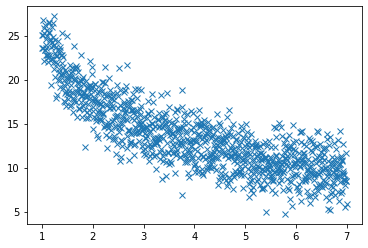

In [18]:
# generate data
rng = np.random.default_rng()
sd_multiplier = 2.0
x = np.linspace(1, 7, 1000)
random_factor = rng.normal(0.0, sd_multiplier, size = len(x))
y = np.abs(25 * x**(-0.5) + random_factor)
w = rng.uniform(0.8, 1.2, len(x))
# with units - generate
xu = x * units("mm")
yu = y * units("MPa")
# show
plt.plot(x, y, 'x')

In [19]:
# Normal - strength
N = PowerlawFitNormal(xu, yu)
print(N.x0)
print(N.y0)
print(N.multiplier)
print(N.exponent)
print(N.sd_multiplier)
print(N.sd_exponent)
#print(N.random(np.array([2, 3, 4]) * units('mm')))
#print(N.density())
#print(N.density(cumulative = True))
print(N.ks_distance())
print(N.loglikelihood(deriv = 0))
print(N.loglikelihood(deriv = 1))
print(N.loglikelihood(deriv = 2))
print(N.covariance())
print(N.covariance(method = 'bootstrap', n = 1000))
#print(N.prediction_interval(n = 5))
#print(N.confidence_interval(n = 5))

1.0 millimeter
1.0 megapascal
24.98389739471604 megapascal
-0.4980667487834249
2.016365421975885 megapascal
0.0
0.968399466160444
-2120.2351278887536
[ 0.00000000e+00 -5.58884260e-12 -5.45696821e-12]
[[-8.01303681e+01 -1.94769886e+03  0.00000000e+00]
 [-1.94769886e+03 -6.31798563e+04  5.54348189e-12]
 [ 0.00000000e+00  5.54348189e-12 -4.91916639e+02]]
[[ 4.97834212e-02 -1.53471562e-03 -1.72949390e-17]
 [-1.53471562e-03  6.31398060e-05  7.11531879e-19]
 [-1.72949390e-17  7.11531879e-19  2.03286476e-03]]
[[ 4.53915602e-02 -1.39135740e-03  5.66362436e-04]
 [-1.39135740e-03  5.88027525e-05 -1.61402620e-05]
 [ 5.66362436e-04 -1.61402620e-05  1.71815509e-03]]


In [13]:
# Lognormal
L = PowerlawFitLognormal(xu, yu)
print(L.x0)
print(L.y0)
print(L.multiplier)
print(L.exponent)
print(L.sdlog)
#print(L.random(np.array([2, 3, 4]) * units('mm')))
#print(L.density())
#print(L.density(cumulative = True))
print(L.ks_distance())
#print(L.loglikelihood(deriv = 0))
#print(L.loglikelihood(deriv = 1))
#print(L.loglikelihood(deriv = 2))
print(L.covariance())
print(L.covariance(method = 'bootstrap', n = 100))
#print(L.prediction_interval(n = 5))
#print(L.confidence_interval(n = 5))


1.0 millimeter
1.0 megapascal
24.24170336090386 megapascal
-0.4514581568709772
0.5063753157407433
0.9813399717131602
[[ 1.08878695e+00 -2.98448558e-02  1.57380426e-03]
 [-2.98448558e-02  9.69451964e-04  5.39851176e-19]
 [ 1.57380426e-03  2.87573575e-19  1.28207980e-04]]
[[ 1.19621823e+00 -3.43517622e-02  9.26171147e-04]
 [-3.43517622e-02  1.13515262e-03 -8.63559474e-06]
 [ 9.26171147e-04 -8.63559474e-06  1.25532725e-04]]


In [12]:
# Uniform
U = PowerlawFitUniform(xu, yu)
print(U.x0)
print(U.y0)
#print(U.x)
#print(U.y)
#print(U.weights)
print(U.multiplier)
print(U.exponent)
print(U.width)
print(U.random(np.array([2, 3, 4]) * units('mm')))
#print(U.density())
#print(U.density(cumulative = True))
print(U.ks_distance())
print(U.loglikelihood(deriv = 0))
print(U.loglikelihood(deriv = 1))
print(U.loglikelihood(deriv = 2))
print(U.covariance())
print(U.covariance(method = 'bootstrap', n = 100))
print(U.prediction_interval(n = 5))
print(U.confidence_interval(n = 5))

1.0 millimeter
1.0 megapascal
39.286686837002215 megapascal
-0.34665260329599906
73.99472841066175 megapascal
[30.47782342909448 20.6958143281509 9.909015756987522] megapascal
0.9869999999999998
-3863.7690334836434
313.3881576326917
None
[[ 3.31181775e+01 -8.65252253e-01  6.08196939e+01]
 [-8.65252253e-01  2.55708045e-02 -1.57380619e+00]
 [ 6.08196939e+01 -1.57380619e+00  1.13142491e+02]]
[[ 3.18481996e+01 -7.49629553e-01  5.83735496e+01]
 [-7.49629553e-01  2.21949883e-02 -1.35202041e+00]
 [ 5.83735496e+01 -1.35202041e+00  1.08364554e+02]]
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[ 4.13919084 74.43418283]
 [ 3.01278757 54.17831388]
 [ 2.55982212 46.03273316]
 [ 2.29227542 41.2214981 ]
 [ 2.10843402 37.91551761]], 'megapascal')>)
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[29.68358712 48.88978655]
 [25.4118983  31.77920315]
 [19.71200974 28.88054554]
 [16.01591755 27.49785597]
 [13.52018876 26.50376287]], 'megapascal')>)


In [6]:
# Gumbel
Gb = PowerlawFitGumbel(xu, yu)
print(Gb.x0)
print(Gb.y0)
print(Gb.multiplier)
print(Gb.exponent)
print(Gb.scale0)
print(Gb.random(np.array([2, 3, 4]) * units('mm')))
#print(Gb.density())
#print(Gb.density(cumulative = True))
print(Gb.ks_distance())
#print(Gb.loglikelihood(deriv = 0))
#print(Gb.loglikelihood(deriv = 1))
#print(Gb.loglikelihood(deriv = 2))
print(Gb.covariance())
print(Gb.covariance(method = 'bootstrap', n = 100))
print(Gb.prediction_interval(n = 5))
print(Gb.confidence_interval(n = 5))

1.0 millimeter
1.0 megapascal
24.17233416272411 megapascal
-0.45703651829532665
9.130842027549605 megapascal
[18.689229732593006 18.079543948300483 14.40450572572028] megapascal
0.9852618336182035
[[ 9.55373345e-01 -2.67038717e-02  3.62372589e-01]
 [-2.67038717e-02  8.68819704e-04 -1.01188512e-02]
 [ 3.62372589e-01 -1.01188512e-02  1.69338183e-01]]
[[ 9.98241789e-01 -2.61728581e-02  3.76660040e-01]
 [-2.61728581e-02  7.96255846e-04 -1.00442639e-02]
 [ 3.76660040e-01 -1.00442639e-02  1.73582951e-01]]
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[ 6.98317337 52.46910208]
 [ 4.59388065 34.51679919]
 [ 3.70586353 27.84455168]
 [ 3.20390801 24.07303494]
 [ 2.86953918 21.56070543]], 'megapascal')>)
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[22.25660261 26.08806571]
 [15.32706894 16.47647148]
 [12.43691486 13.21886277]
 [10.65921239 11.52151576]
 [ 9.44604023 10.41984486]], 'megapascal')>)


In [7]:
# gamma
G = PowerlawFitGamma(xu, yu)
print(G.multiplier)
print(G.exponent)
print(G.shape)
print(G.x0)
print(G.y0)
#print(G.random(np.array([2, 3, 4]) * units('mm')))
#print(G.density())
#print(G.density(cumulative = True))
print(G.ks_distance())
#print(G.loglikelihood(deriv = 0))
#print(G.loglikelihood(deriv = 1))
#print(G.loglikelihood(deriv = 2))
print(G.covariance())
print(G.covariance(method = 'bootstrap', n = 100))
#print(G.prediction_interval(n = 5))
#print(G.confidence_interval(n = 5))



24.25370859466007 megapascal
-0.45895715806387005
4.355066787807545
1.0 millimeter
1.0 megapascal
0.9860938056207377
[[ 9.52339464e-01 -2.65342387e-02  2.12740835e-16]
 [-2.65342387e-02  8.61486384e-04 -6.90705072e-18]
 [ 2.12740835e-16 -6.90705072e-18  3.52617649e-02]]
[[ 1.02612677e+00 -3.08700494e-02 -1.67457054e-02]
 [-3.08700494e-02  1.04216592e-03  2.54400066e-04]
 [-1.67457054e-02  2.54400066e-04  4.21116696e-02]]


In [8]:
# Weibull
P = PowerlawFitWeibull(x, y)
print(P.colinear)
print(P.multiplier)
print(P.exponent)
print(P.shape)
print(P.x0)
print(P.y0)
print(P.random(np.array([2, 3, 4])))
print(P.ks_distance())
print(P.covariance())
print(P.covariance(method = 'bootstrap'))
print(P.confidence_interval())

False
24.61145083848937
-0.4687922308921901
2.190555238895413
1.0
1.0
[24.69690689 22.36572297 20.44685102]
0.9884909274084731
[[ 9.01615872e-01 -2.42609473e-02  7.05256397e-03]
 [-2.42609473e-02  7.74415633e-04 -2.33717684e-05]
 [ 7.05256397e-03 -2.33717684e-05  2.60546174e-03]]
[[ 1.26880044e+00 -3.42052799e-02  2.24292811e-03]
 [-3.42052799e-02  1.03893407e-03  2.55181031e-05]
 [ 2.24292811e-03  2.55181031e-05  4.42555296e-03]]
(array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
       1.66, 1.72, 1.78, 1.84, 1.9 , 1.96, 2.02, 2.08, 2.14, 2.2 , 2.26,
       2.32, 2.38, 2.44, 2.5 , 2.56, 2.62, 2.68, 2.74, 2.8 , 2.86, 2.92,
       2.98, 3.04, 3.1 , 3.16, 3.22, 3.28, 3.34, 3.4 , 3.46, 3.52, 3.58,
       3.64, 3.7 , 3.76, 3.82, 3.88, 3.94, 4.  , 4.06, 4.12, 4.18, 4.24,
       4.3 , 4.36, 4.42, 4.48, 4.54, 4.6 , 4.66, 4.72, 4.78, 4.84, 4.9 ,
       4.96, 5.02, 5.08, 5.14, 5.2 , 5.26, 5.32, 5.38, 5.44, 5.5 , 5.56,
       5.62, 5.68, 5.74, 5.8 , 5.86, 5.92, 5.98, 6.04

In [9]:
# Weibull with units
Pu = PowerlawFitWeibull(xu, yu)
print(Pu.x0)
print(Pu.y0)
print(Pu.colinear)
print(Pu.multiplier)
print(Pu.exponent)
print(Pu.shape)
print(Pu.random(np.array([2, 3, 4]) * units("mm")))
print(Pu.ks_distance())
print(Pu.xrange())
print(Pu.predict())
print(Pu.get_scale(Pu.xrange()))
print(Pu.prediction_interval(level = 0.5))
print(Pu.covariance())
print(Pu.covariance(method = 'bootstrap'))
print(Pu.confidence_interval())


1.0 millimeter
1.0 megapascal
False
24.61145083848937 megapascal
-0.4687922308921901
2.190555238895413
[5.762140830746634 16.85394332949281 17.08481289631911] megapascal
0.9884909274084731
[1.0 1.06 1.12 1.18 1.24 1.3 1.3599999999999999 1.42 1.48 1.54 1.6 1.66 1.72 1.78 1.8399999999999999 1.9 1.96 2.02 2.08 2.1399999999999997 2.2 2.26 2.32 2.38 2.44 2.5 2.56 2.62 2.6799999999999997 2.74 2.8 2.86 2.92 2.98 3.04 3.1 3.16 3.2199999999999998 3.28 3.34 3.4 3.46 3.52 3.58 3.6399999999999997 3.6999999999999997 3.76 3.82 3.88 3.94 4.0 4.0600000000000005 4.12 4.18 4.24 4.3 4.359999999999999 4.42 4.48 4.54 4.6 4.66 4.72 4.779999999999999 4.84 4.9 4.96 5.02 5.08 5.14 5.2 5.26 5.32 5.38 5.4399999999999995 5.5 5.56 5.62 5.68 5.74 5.8 5.859999999999999 5.92 5.9799999999999995 6.04 6.1 6.16 6.22 6.279999999999999 6.34 6.3999999999999995 6.46 6.52 6.58 6.64 6.7 6.76 6.819999999999999 6.88 6.9399999999999995 7.0] millimeter
[24.61145083848937 24.54245974531117 24.474070990162566 24.406275786085853 24.3

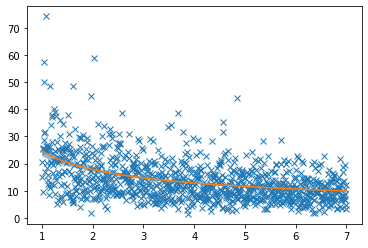

In [11]:
# test with plot
xf = Pu.xrange()
yf = Pu.predict(xf)
xc,yc = Pu.confidence_interval()
plt.plot(Pu.x, Pu.y, 'x')
plt.plot(xf, yf, '-')
plt.fill_between(xc, *yc.transpose(), alpha = 0.5)